### Plotting Standard Normal Distribution $$\sim \mathcal{N}(0,\,1)$$

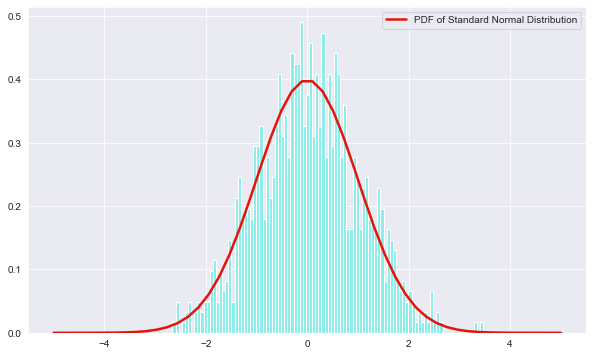

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(777)
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_style('darkgrid')

n = np.random.randn(1000);    # 1000 Standard normal random numbers N(0,1).
ax = plt.gca();
ax.hist(n, bins = 100, density = True, color = "#8eede8");
x = np.linspace(-5,5);
y = 1/np.sqrt(2*np.pi) * np.exp( -x**2/2 );
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');
plt.legend(["PDF of Standard Normal Distribution"], loc ="upper right");

### Plotting Normal Distribution with mean $\mu$ and standard deviation $\sigma$ $$X \sim \mathcal{N}(\mu,\,\sigma^{2})$$

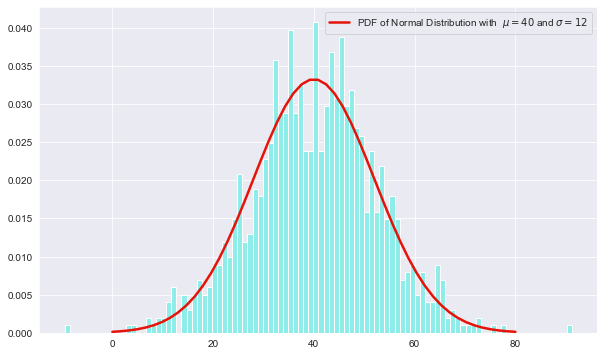

In [4]:
mu = 40;
sigma = 12;
n = sigma * np.random.randn(1000) + mu;    # 1000 Standard normal random numbers N(40,144).
ax = plt.gca();
ax.hist(n, bins = 100, density = True, color = "#8eede8");
x = np.linspace(0,80);
y = 1/np.sqrt(2*np.pi*144) * np.exp( -(x-40)**2/(2*144) );
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');
plt.legend(["PDF of Normal Distribution with  $\mu=40$ and $\sigma=12$"], loc ="upper right");

### The Central Limit Theorem

If $X_i$ are independent identically distributed random variables with mean $\mu$ and standard deviation $\sigma$ then
their average

$$ \overline{X}_n=\frac{1}{n} \sum_{i=1}^n X_i $$

is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$ for large enough $n$. i.e.
$$Y_n=\frac{\sqrt{n} (\overline{X}_n - \mu) }{\sigma} = \sum_{i=1}^n \frac{X_i-\mu}{\sigma \sqrt{n}} $$
converges in distribution to a standard normal distribution as $n \to \infty$.

We have rescaled $\overline{X}_n$ by $\mu$ and divided by $\frac{\sigma}{\sqrt{n}}$ so that its centered $\mu = 0$ and $\sigma = 1$. We will simulate **CLT** numerically by generating 100000 samples of the random variable $Y_n$ for $n=100$ and we will see if a histogram of the results is approximately normally distributed.
We will try the case when each $X_i$ is **uniformly distributed on $[0,1]$ with $\mu = 0.5$ and $\sigma = \frac{1}{\sqrt{12}}$ since $\mu = \frac{a+b}{2} $ and $\sigma^{2} = \frac{(b-a)^2}{12}$. for $X \sim U[a,b]$**.

$X$ is a random matrix containing 100000 rows and 100 columns. Each column corresponds to a value of the index $i$. Each row corresponds to a different random sample of $Y_n$.

The shape of X is: (100000, 100).
The shape of Y is: (100000,).


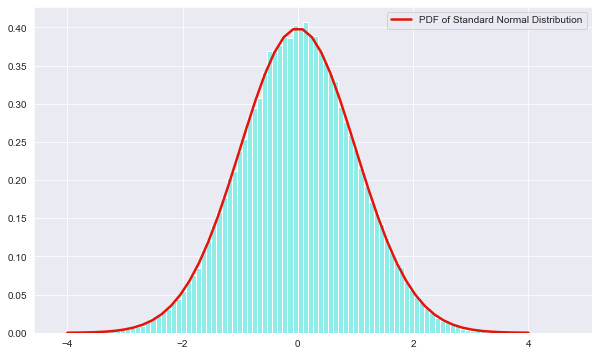

In [5]:
n = 100;
N = 100000;    # Number of samples.
X = np.random.rand(N,n);    # Nxn matrix of Uniform Random Numbers between 0 and 1.
print(f"The shape of X is: {X.shape}.");
mu = 0.5;    # Mean of Uniform distribution U[0,1].
sigma = np.sqrt(1/12);    # Standard Deviation of Uniform distribution U[0,1].
Y = np.sum( (X-mu)/(sigma*np.sqrt(n)), 1); # Summing horizontally(add up the columns).Y is Nx1 matrix. If the second 
                                             # argument is 0 instead of 1 then we sum vertically(add up rows). 
print(f"The shape of Y is: {Y.shape}.");
plt.gca().hist(Y, bins=100, density=True,color = "#8eede8");    # Plotting histogram of Y. density gives proportion in each bin.
x = np.linspace(-4,4);
y = 1/np.sqrt(2*math.pi) * np.exp(-x**2/2);    # PDF of Standard Normal Distribution.
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');   # Superimposing PDF of Standard Normal Distribution.
plt.legend(["PDF of Standard Normal Distribution"], loc ="upper right");

### Inverse Transform Sampling
Simulating a random variable $X$ means generating another random variable $\tilde{X}$ which has the same distribution as $X$. Suppose that $X$ has an CDF $F_X$ which is invertible $F^{-1}_X$, if $U$ is a standard uniform random variable $\sim U[0,1]$ then we can use $\tilde{X}=F^{-1}_X(U)$ to simulate $X$. This is because of the following lemma:

**Lemma:**

Suppose $X$ has cumulative distribution function $F_X:{\mathbb R}\to[0,1]$ and suppose that this is invertible with
inverse $F^{-1}_X$ and if $U$ is uniformly distributed on $[0,1]$, Then $\tilde{X}:=F^{-1}_X(U)$ will have the same distribution as $X$. 

*Proof:*
$$ F_{\tilde{X}}(t):=P(\tilde{X}\leq t)=P(F^{-1}_X(U)\leq t)=P(U\leq F_X(t))=F_U(F_X(t))=F_X(t). \square$$ 
The last step uses the fact that $U$ has a standard uniform distribution so $P(U \leq q)=q\frac{1}{(1-0)}=q$ for any $q \in [0,1]$.

Note: Inverse sampling does not work with all distributions since their inverse CDF is not well-defined(as in bivariate distributions). In those cases we use other sampling methods such as Acceptance-Rejection Sampling method or Metropolis-Hastings Algorithm (Markov Chain Monte Carlo).

### Simulating  Cauchy Distributed Random Variables Using Inverse Transformation
Standard Cauchy distributed random variable $X$ has:


| Cauchy distributed random variable| | |
| :---        |    ----:   |     |     
| PDF     | $$f_X(x)=\frac{1}{\pi(1+x^2)}$$ | 
| CDF     | $$F_X(x)=\tfrac{1}{\pi} \arctan(x) + \tfrac{1}{2}$$ | 

The inverse CDF is $F^{-1}_X(x)=\tan( \pi x-\pi \tfrac{1}{2})$.

Hence, $\tilde{X}:=F^{-1}_X(U) = tan(\pi U-\pi \tfrac{1}{2})$ will follow a Cauchy distribution.

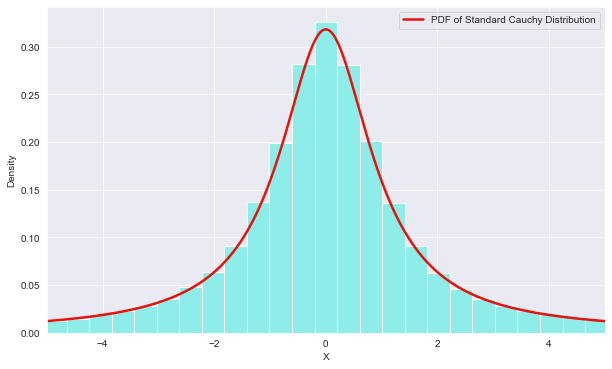

In [6]:
# Simulating Cauchy distribution.

def pdf_for_cauchy(x):
    '''
    PDF of Standard Cauchy distribution.
    '''
    return 1/(np.pi*(1+x**2))

def inv_distribution_for_cauchy(x):
    '''
    Inverse CDF of Standard Cauchy distribution.
    '''
    return np.tan(x*np.pi - np.pi/2)

n = 100000;
U = np.random.rand(n);    # 100000 Uniform Random Numbers between 0 and 1.
C = inv_distribution_for_cauchy(U);    # 100000 Cauchy distributed Random Numbers using inverse transform.
plt.gca().hist(C, density='true', bins=np.linspace(-20,20,100),color = "#8eede8");
plt.gca().set_xlim(-5,5);

x = np.linspace(-5,5,1000);
y = pdf_for_cauchy(x);
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');
plt.gca().set_xlabel('X');
plt.gca().set_ylabel('Density');
plt.legend(["PDF of Standard Cauchy Distribution"], loc ="upper right");

### Simulating  Exponentially Distributed Random Variables Using Inverse Transformation
Exponentially distributed random variable $X$ with parameter $\lambda$ has:


| Exponentially distributed random variable| | |
| :---        |    ----:   |     |     
| PDF     | $$f_X(x)=\lambda e^{-\lambda x}$$ | 
| CDF     | $$F_X(x)=1-e^{-\lambda x}$$ | 

The inverse CDF is $F^{-1}_X(x)=-\frac{1}{\lambda} \log(1-x)$.

Hence, $\tilde{X}:=F^{-1}_X(U) = -\frac{1}{\lambda} \log(1-U)$ will follow a exponential distribution.

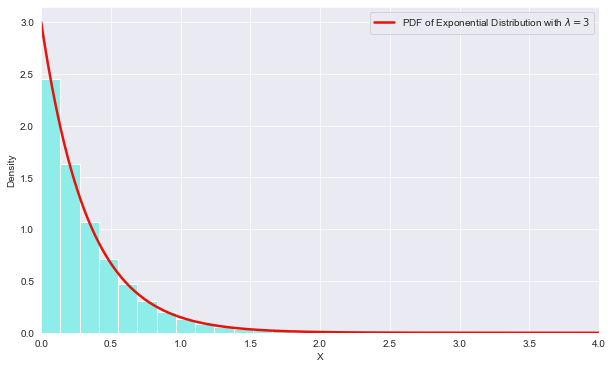

In [7]:
# Simulating Exponential distribution with parameter lambda=3.

def pdf_for_exp(lmbda, x):
    '''
    PDF of Exponential distribution.
    '''
    return lmbda*np.exp(-lmbda*x)

def inv_distribution_for_exp(lmbda,x):
    '''
    Inverse CDF of Exponential distribution.
    '''
    return -(1/lmbda)*np.log(1-x)

n = 1000000;
lmbda = 3.0;
U = np.random.rand(n);    # 1000000 Uniform Random Numbers between 0 and 1.
E = inv_distribution_for_exp(lmbda,U);    # 1000000 Exponentially distributed Random Numbers using inverse transform.
plt.gca().hist(E, density='true', bins=np.linspace(0,4,30),color = "#8eede8");

x = np.linspace(0,12,1000);
y = pdf_for_exp(lmbda,x);
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');
plt.gca().set_xlim(0,4);
plt.gca().set_xlabel('X');
plt.gca().set_ylabel('Density');
plt.legend(["PDF of Exponential Distribution with $\lambda = 3$"], loc ="upper right");

### CLT And Mean Of Random Variable
If we have i.i.d random variables $X_1$, $X_2$, ...,$X_n$, Then the mean $$\frac{X_1+X_2+\dots+X_n}{n}$$ is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$ for large enough $n$(say $n\geq 30$). 
Cauchy distribution is a pathological case since it doesn't have a finite mean or variance so one cannot apply the Central Limit Theorem. We will test this numerically for Cauchy and Uniform distribution.

Checking Cauchy Distribution.
Does not converge to Mean.
Checking Uniform Distribution.
Converges to Mean.


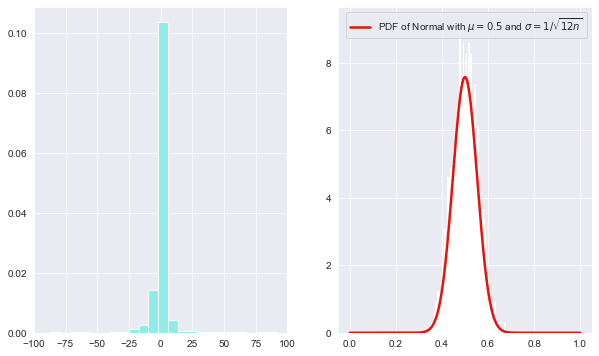

In [8]:
n = 30;
N = 1000;    # Number of samples.
U = np.random.rand(N,n);    # Nxn matrix of Uniform Random Numbers between 0 and 1.
X = inv_distribution_for_cauchy(U);
Y = (np.sum(X, 1))/n;
fig, [ax1,ax2] = plt.subplots(1,2);
ax1.hist(Y, bins=100, density=True, color = "#8eede8"); 
ax1.set_xlim(-100,100);

Usum = (np.sum(U,1))/n;
ax2.hist(Usum, bins=100, density=True, color = "#8eede8");
mu = 0.5;    # Mean of Uniform distribution U[0,1].
sigma = (np.sqrt(1/12))/np.sqrt(n);    # Standard Deviation of Uniform distribution U[0,1] divided by sqrt(n).
x = np.linspace(0,1,1000);
y = 1/(sigma*np.sqrt(2*np.pi)) * np.exp( -0.5 *((x-mu)/sigma)**2);
ax2.plot(x,y,c ='#e6130b',linewidth = '2.5');
ax2.legend(["PDF of Normal with $\mu = 0.5$ and $\sigma = 1/\sqrt{12n}}$"], loc ="best");

# Testing Convergence to mean to that of Uniform distribution (condition of CLT).
def mean_convergence(X,mean):
    '''
    Checks convergence of mean of X to true mean.
    '''
    assert (abs(np.mean(X)-mean)<0.01), "Does not converge to Mean."
    print("Converges to Mean.")

print("Checking Cauchy Distribution.")
try:
    mean_convergence(Y,mu)
except AssertionError as error:
    print(error)    

print("Checking Uniform Distribution.")
try:
    mean_convergence(Usum,mu)
except AssertionError as error:
    print(error)

Notice, Uniform Distribution converges to Gaussian distribution for large n as we can apply the central limit theorem to uniform random variables. Cauchy distribution does not converge to Gaussian distribution. If $X$ and $Y$ are independent Standard Normal random variables then $Z = \frac{X}{Y}$ follows Standard Cauchy distribution. The reciprocal of $Z$ is equally Cauchy. Since, Cauchy has a fat tail, there is high probability of having extreme values and thus does not converge to mean. 

### Simulating Poisson Random Variable
A discrete random variable $X$ is Poisson distributed with parameter $\lambda > 0$ if its PMF is 
$$f(x) = P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!}$$
$\lambda = \mathbb{E}(X) = Var(X)$ for Poisson distribution.

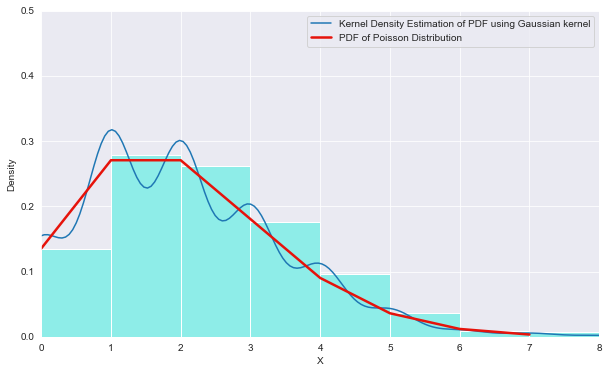

In [21]:
from scipy.special import factorial

def poisson(lam):
    u = np.random.rand()
    n = 0
    e = np.exp(-lam)
    p = e
    factorial = 1
    power = 1
    while u>p:
        n += 1
        factorial = n * factorial
        power = lam * power
        p += (power/factorial)*e
    return n

N = 1000
lam = 2
X = np.zeros(N)
for i in np.arange(len(X)):
    X[i] = poisson(lam)

fig, ax = plt.subplots()
ax.hist(X, bins=8, density=True, color = "#8eede8");
ax.set_xlim(0,8);
ax.set_ylim(0,0.5);
ax.set_xlabel('X');
ax.set_ylabel('Density');
sns.kdeplot(X,label='Kernel Density Estimation of PDF using Gaussian kernel');    # kernel density estimation.
x = np.arange(8);
y = (lam**x * np.exp(-lam))/(factorial(x));    # PDF of Poisson Distribution.
ax.plot(x,y,c ='#e6130b',linewidth = '2.5',label='PDF of Poisson Distribution');   # Superimposing PDF of Poisson Distribution.
ax.legend();

### Application Of CLT and Convergence to Standard Normal Distribution

The shape of X is: (100000, 1000).
The shape of Y is: (100000,).


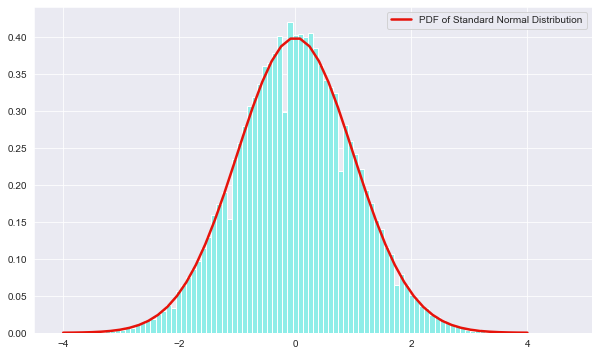

In [10]:
n = 1000;
N = 100000;    # Number of samples.
lam = 2; # lambda.
X = np.random.poisson(lam, size=(N, n));    # Nxn matrix of Poisson Random Numbers with lambda = 2.
print(f"The shape of X is: {X.shape}.");

mu = lam;    # Mean of Poisson distribution.
sigma = np.sqrt(lam);    # Standard Deviation of Poisson distribution.
Y = np.sum((X-mu)/(sigma*np.sqrt(n)), 1); # Summing horizontally(add up the columns).Y is Nx1 matrix.  
print(f"The shape of Y is: {Y.shape}.");

plt.gca().hist(Y, bins=100, density=True,color = "#8eede8");    # Plotting histogram of Y.
x = np.linspace(-4,4);
y = 1/np.sqrt(2*math.pi) * np.exp(-x**2/2);    # PDF of Standard Normal Distribution.
plt.gca().plot(x,y,c ='#e6130b',linewidth = '2.5');   # Superimposing PDF of Standard Normal Distribution.
plt.legend(["PDF of Standard Normal Distribution"], loc ="upper right");